In [4]:
#                Vitória de Moraes Dutra 
#                      GES - 414                   
#            Computação Gráfica e Multimídia - C209 L2 
#                 Projeto 1 - 04/04/2025 
#             Monitor: Felipe Santos de Souza     

Nesse porjeto foi utilizado quatro imagens de pinguins, para a realização das 6 operações solicitadas 

1.	Juntar todas as imagens em uma única
    Depois da abertura das imagens, foi feita a transformação para o padrão RGB. Após isso foi transformada em matriz, deixando todas as imagens do mesmo tamanho da imagem 1 (P1.png). Com o mesmo tamnho, foi realizado a soma das matrizes, garantindo que não ultrapasse o valor de 255.  as converti

2.	Trocar as cores (mudar a cor dos pinguins para qualquer outra) 
    Escolhi fazer a troca dos canais azul e canais vermelho. Os pixels azuis viraram vermelhos e os pixels vermlehos ficaram azul.

3.	Aplicar o espelhamento
    O espelhamento da imagem foi no eixo x, o que significa que o eixo y se mantém, e os pixels que estavam na esquerda vão para a direita.

4. Recortar seu pinguim favorito (descarte os outros, deixando apenas um na imagem).   
   Eu escolhi recortar o pinguim 1, para isso usei a operação AND bit a bit, que pegou o que tinha em comum entre a imagem resultante do espelhamento e a imagem 1. 

5.	Faça a analise do histograma em seu pinguim favorito e escolha um valor de threshold. (Justifique a escolha do threshold)
    Antes de fazer o histograma eu converti a imagem para uma escala de cinza, usando o método de luminosidade, e depois fiz o histograma e o plotei junto da imagem cinza, através de uma função. O maior pico foi entre 200 e 250, o que indica que há mais pontos brancos na imagem, por isso escolhi o threshold de 200 para a próxima etapa, pois acho que é um valor que separa bem os pontos de luz dos pontos de sombra.

6.	Aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de sua cor favorita (por exemplo: Azul)
    Eu escolhi rosa pink, então primeiro eu pesquisei como fazer o rosa a partir do RGB, e criei uma matriz para a cor rosa, depois criei uma máscara para garantir que só seriam pintados os pixels abaixo de 200, e por fim apliquei a tintura e plotei a imagem.


[237 237 237]


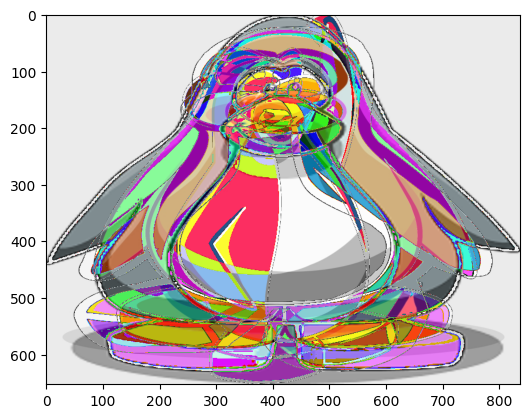

In [1]:
# 1 - Juntar todas as imagens em uma única

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image


p1 = Image.open("P1.png").convert("RGB")
p2 = Image.open("P2.png").convert("RGB")
p3 = Image.open("P3.jpg").convert("RGB")
p4 = Image.open("P4.png").convert("RGB")

p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)
p4 = np.array(p4)

p2 = Image.fromarray(p2).resize(p1.shape[1::-1])
p2 = np.array(p2)
p3 = Image.fromarray(p3).resize(p1.shape[1::-1])
p3 = np.array(p3)
p4 = Image.fromarray(p4).resize(p1.shape[1::-1])
p4 = np.array(p4)

img = p1 + p2 + p3 + p4
img = np.clip(img, 0, 255)
img = img.astype(np.uint8)

print(img[0, 0])
plt.imshow(img)     

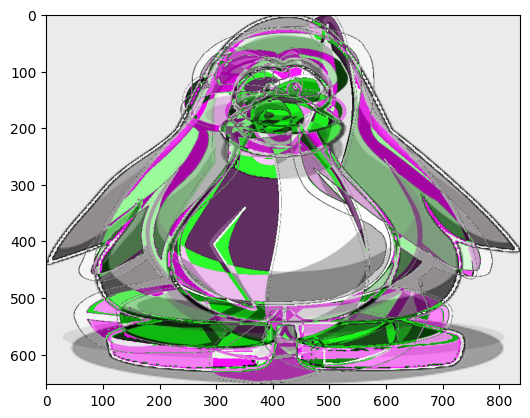

In [2]:
# 2 - Troca as Cores da Imagem

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img_cor = img.copy()
img_cor[:, :, 0], img_cor[:, :, 2] = img_cor[:, :, 2], img_cor[:, :, 0]

plt.imshow(img_cor)

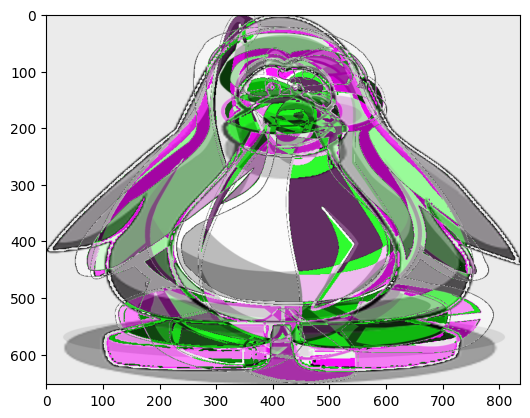

In [3]:
# 3 - Reflexão da Imagem em y:

(l, c, p) = img_cor.shape

img_refl = np.zeros(shape=img_cor.shape, dtype=np.uint8)
for i in range(l):
    for j in range(c):
        new_x = -j
        new_y = i
        img_refl[new_y, new_x] = img_cor[i, j]

plt.imshow(img_refl)

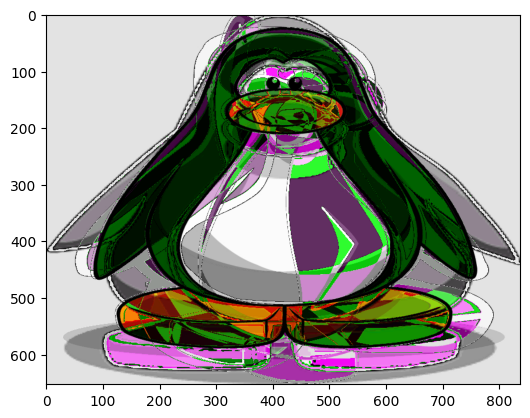

In [4]:
# 4 - Recortando o Pinguim 4 (Meu Favorito) da Imagem Espelhada

img_recorte = img_refl & p4
plt.imshow(img_recorte)

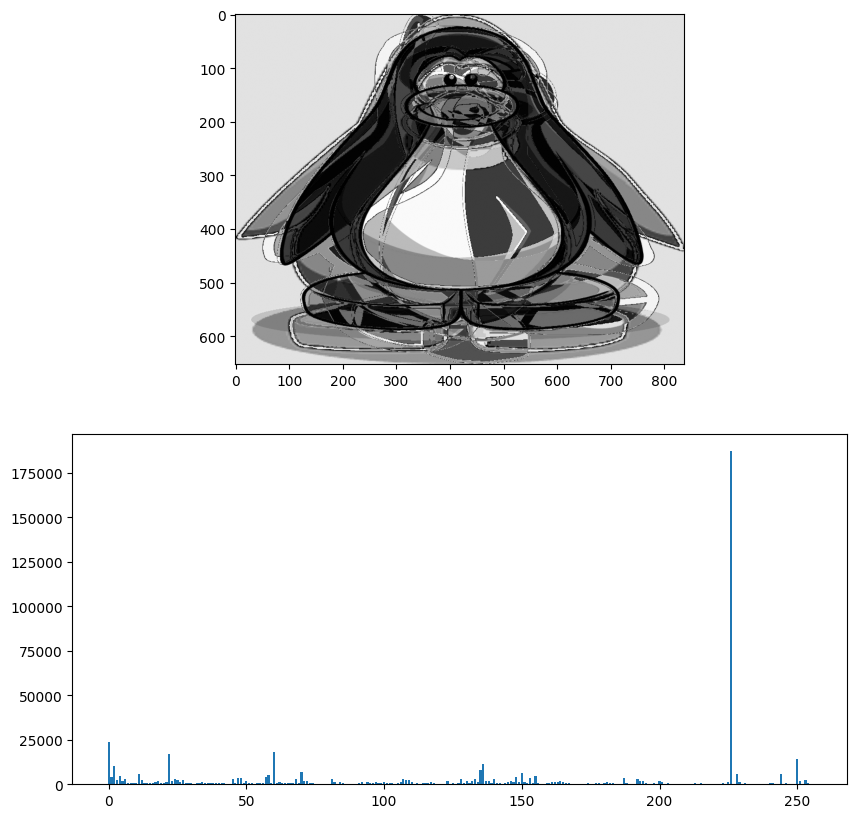

In [5]:
# 5 - Analise do Histograma e Escolha um valor de Threshold
# Valor de Threshold foi 200

def grey_scale(imagem):
    (l, c, p) = imagem.shape
    img_avg = np.zeros(shape=(l, c), dtype = np.uint8)
    for i in range(l):
        for j in range(c):
            r = float(imagem[i, j, 0])
            g = float(imagem[i, j, 1])
            b = float(imagem[i, j, 2])
            img_avg[i, j] = 0.2126 * r + 0.7152 * g + 0.0722 * b
    return img_avg

img_gray = grey_scale(img_recorte)

def histogram_gray(imagem):
    (l, c) = imagem.shape
    histogram = np.zeros(256, dtype=np.int32)
    for i in range(l):
        for j in range(c):
            intensity = imagem[i, j]
            histogram[intensity] += 1
    return histogram

def show_histogram_gray(imagem):
    histogram = histogram_gray(imagem)
    plt.figure(figsize=(10, 10))
    plt.subplot(2, 1, 1)
    plt.imshow(imagem, cmap='gray', vmin=0, vmax=255)
    plt.subplot(2, 1, 2)
    plt.bar(range(256), histogram)

show_histogram_gray(img_gray)

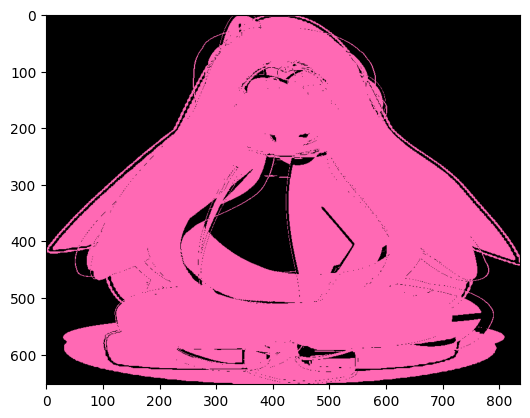

In [6]:
# 6 - Pintando Abaixo do Threshold de Rosa Pink 


tinted = np.zeros((img_gray.shape[0], img_gray.shape[1], 3), dtype=np.uint8)
pink_color = np.array([255, 105, 180], dtype=np.uint8)
mask = img_gray < 200
tinted[mask] = pink_color

plt.imshow(tinted)

In [8]:
Image.fromarray(tinted).save("resultado.jpg")